<a href="https://colab.research.google.com/github/Ayodeleky/PHYS-4061/blob/main/PHYS_4061_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THINK ABOUT IT SECTION 


1. We would expect to see 3 lamb dips as follows:
5 S1/2 @ F=2 --> F'= 1,2,3
5 P 3/2 @ F= 3 --> F'= 2,3,4


2. The experiment was done so that the background subtracted beam intentially passed through the rubidium cell to act as a counter propagating beam. This allowed for only monitoring of the probe beam and hence removing the background subtraction from our results.

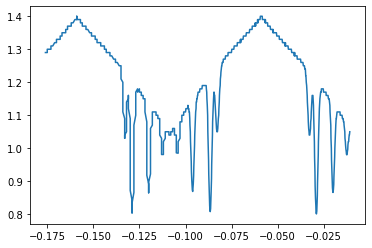

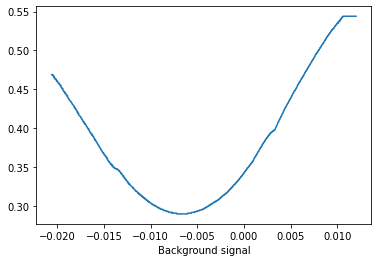

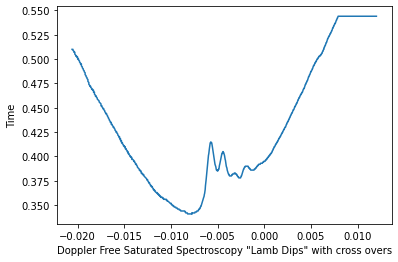

In [40]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.optimize import curve_fit

t_arr = []
data = []
data_2= []
data_sub = []
t_sub = []
t_1= []   
t_2 = []

with open("ex.1.csv") as csv_file:
  csv_reader= csv.reader(csv_file,delimiter=",")
  line_count = 0
  for row in csv_reader:
    t_arr.append(float(row[0]))
    data.append(float(row[1]))


with open("ex2 background.csv") as csv_file_bg:
  csv_reader_bg= csv.reader(csv_file_bg, delimiter=",")
  line_count=0
  for row in csv_reader_bg:
    t_2.append(float(row[0]))
    data_2.append(float(row[1]))

## We zoomed in on the largest absorption feature corresponding to F=3 to obtain the following results

with open("ex 2 lab 6 (biggest doppler peak).csv") as csv_file_bg:
  csv_reader_bg= csv.reader(csv_file_bg, delimiter=",")
  line_count=0
  for row in csv_reader_bg:
    t_sub.append(float(row[0]))
    data_sub.append(float(row[1]))


plt.plot(t_arr,data)
plt.show()
plt.plot(t_2,data_2)
plt.xlabel('Background signal')
plt.show()
plt.plot(t_sub,data_sub)
plt.xlabel('Doppler Free Saturated Spectroscopy "Lamb Dips" with cross overs')
plt.ylabel("Time")
plt.show()


700
315


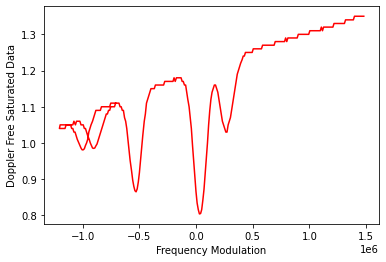

In [12]:
full_range= data_sub[150:850]
# plt.plot(full_range)
# plt.show()
plt.xlabel('Full range of Lamb Dips')
print(len(full_range))


full_spec= data[150:465]
print(len(full_spec))
volt_mod=[]

with open("ex.1.csv") as csv_file:
  csv_reader= csv.reader(csv_file,delimiter=",")
  line_count = 0
  for row in csv_reader:
    t_arr.append(float(row[0]))
    data.append(float(row[1]))
    volt_mod.append(float(row[2]))

eta= 3280000
volt_range_1= volt_mod[150:465]

eta_volt = [i * eta for i in volt_range_1]

plt.plot(eta_volt,full_spec,'red')
plt.xlabel('Frequency Modulation')
plt.ylabel('Doppler Free Saturated Data')
plt.show()


By using the voltage to frequency conversion from previous lab results, we can convert the Doppler Free saturation restults on scale of frequency to determine which peaks are cross overs vs which are actually Lamb dips.
Looking at the resulting graph above we see that there are only 3 Lamb dips which occur when we zoom in on the largest peak on out spectrum.


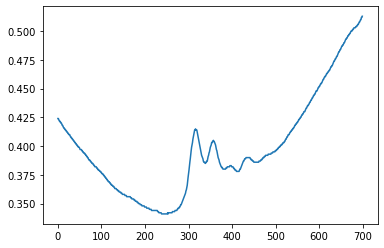

700


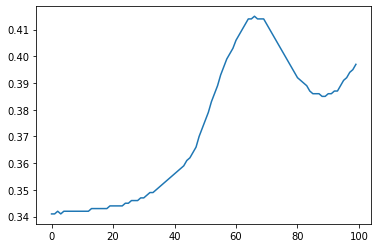

100


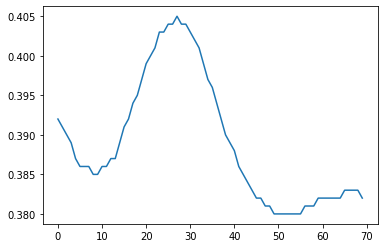

70


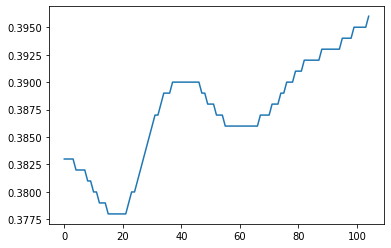

105


In [28]:
## At Home #2
## From above, we can see that the first peak is a cross over peak and not an actual lamb dip, the lamb dips correspond to the F=2,3 and 1 peaks

from scipy.optimize import curve_fit

## Starting by finding the range for all the peaks
full_range= data_sub[150:850]
plt.plot(full_range)
plt.show()
print(len(full_range))

## Now we can narrow down each peak that is actually a lamb dip, so we will fit each peak that is a Lamb dip in the following section

F_2= data_sub[400:500]
plt.plot(F_2)
plt.show()
print(len(F_2))

F_3= data_sub[480:550]
plt.plot(F_3)
plt.show()
print(len(F_3))

F_1= data_sub[545:650]
plt.plot(F_1)
plt.show()
print(len(F_1))


At Home #3
For one Lamb Dip from any trace, fit it to a Gaussian, and a Lorenztian. Which is the better fit? What is the linewidth? How does this compare with expectations?

In [48]:
def Gauss(b,y0, a, b0, sigma):
    return y0+a * np.exp(-(b - b0)**2 / (2 * sigma**2))

In [56]:
def lorentzian(x, l, x0):
    return l / ((x-x0)**2 + l**2) / np.pi

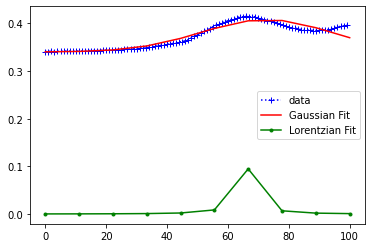

In [65]:
## Choosing out F=2 peak, we will attempt to fit the peak to both a Gaussian and a Lorenztian

#We will start by fitting the F=2 peak to a Gaussion:

x = np.arange(100)
xx = np.linspace(0, 100, 10)
y_peak = F_2
mean = sum(x * y_peak) / sum(y_peak)
sigma = np.sqrt(sum(y_peak * (x - mean)**2) / sum(y_peak))

popt,pcov = curve_fit(Gauss, x, y_peak, p0=[1000,max(y_peak), mean, sigma])
plt.plot(x, y_peak, 'b+:', label='data')
plt.plot(xx, Gauss(xx, *popt), 'r-', label='Gaussian Fit')



## Now we will fit F=2 to a Lorentzian
xdata=np.arange(100)
xx_1= np.linspace(0,100,10)
y_peak = F_2
a_trial = 1 / (np.pi * max(y_peak))
x0_trial = sum(xdata * y_peak) / sum(y_peak)
p_guess = [a_trial, x0_trial]

popt, pcov = curve_fit(lorentzian, xdata, y_peak, p0 = p_guess)
a, x0 = popt[0], popt[1]
plt.plot(xx_1, lorentzian(xx_1, *popt), 'g.-', label='Lorentzian Fit')
plt.legend()
plt.show()

From the above graph, on comparing the model of our data to a Gaussian vs a Lorentzian we see that the Gaussian is the better fit. 

In [128]:
#Now that we have fitted our data, we can find the FWHM
fit_stdev= np.std(eta_volt)

FWHM = 2*np.sqrt(2*np.log(2))*fit_stdev
print('The full width at half maximum is:',FWHM,'Hz')

The full width at half maximum is: 1928752.4727889863 Hz
